# Métodos de análisis de componentes



En ciencia de datos, el análisis de componentes principales (PCA) es una técnica de reducción de dimensionalidad que se utiliza para transformar un conjunto de datos de muchas variables en un conjunto de datos de pocas variables. El PCA conserva la mayor cantidad de información posible en el conjunto de datos original, mientras que reduce el número de variables a un número manejable.

El PCA se basa en la idea de que las variables en un conjunto de datos a menudo están correlacionadas entre sí. El PCA encuentra una nueva base de variables, llamada componentes principales, que son linealmente independientes entre sí. Cada componente principal es una combinación lineal de las variables originales, y está diseñado para capturar la mayor cantidad de varianza posible en el conjunto de datos.

El PCA se utiliza en una variedad de aplicaciones de ciencia de datos, incluyendo:

- Visualización: El PCA se puede utilizar para visualizar conjuntos de datos de alta dimensionalidad. Al proyectar los datos en un espacio de dos o tres dimensiones, el PCA puede ayudar a los científicos de datos a identificar patrones y tendencias que no serían visibles en el conjunto de datos original.

- Aprendizaje automático: El PCA se puede utilizar para mejorar el rendimiento de los modelos de aprendizaje automático. Al reducir la dimensionalidad de los datos, el PCA puede ayudar a los modelos a aprender patrones más fácilmente y a generalizar mejor a nuevos datos.

- Preprocesamiento de datos: El PCA se puede utilizar para preparar los datos para su análisis posterior. Al eliminar las variables redundantes o irrelevantes, el PCA puede ayudar a mejorar la precisión y la eficiencia de los algoritmos de análisis de datos.

Un ejemplo de cómo se puede utilizar el PCA en ciencia de datos es el análisis de las características de los vinos. Un conjunto de datos de vinos podría incluir variables como el contenido de alcohol, el pH, el contenido de azúcar y el color. El PCA podría utilizarse para reducir estas variables a un número más manejable, como dos o tres componentes principales. Estos componentes principales podrían representar la calidad del vino, el tipo de vino o la región de producción.

El PCA es una herramienta poderosa que puede ser utilizada en una variedad de aplicaciones de ciencia de datos. Al reducir la dimensionalidad de los datos, el PCA puede ayudar a los científicos de datos a identificar patrones y tendencias, mejorar el rendimiento de los modelos de aprendizaje automático y preparar los datos para su análisis posterior.

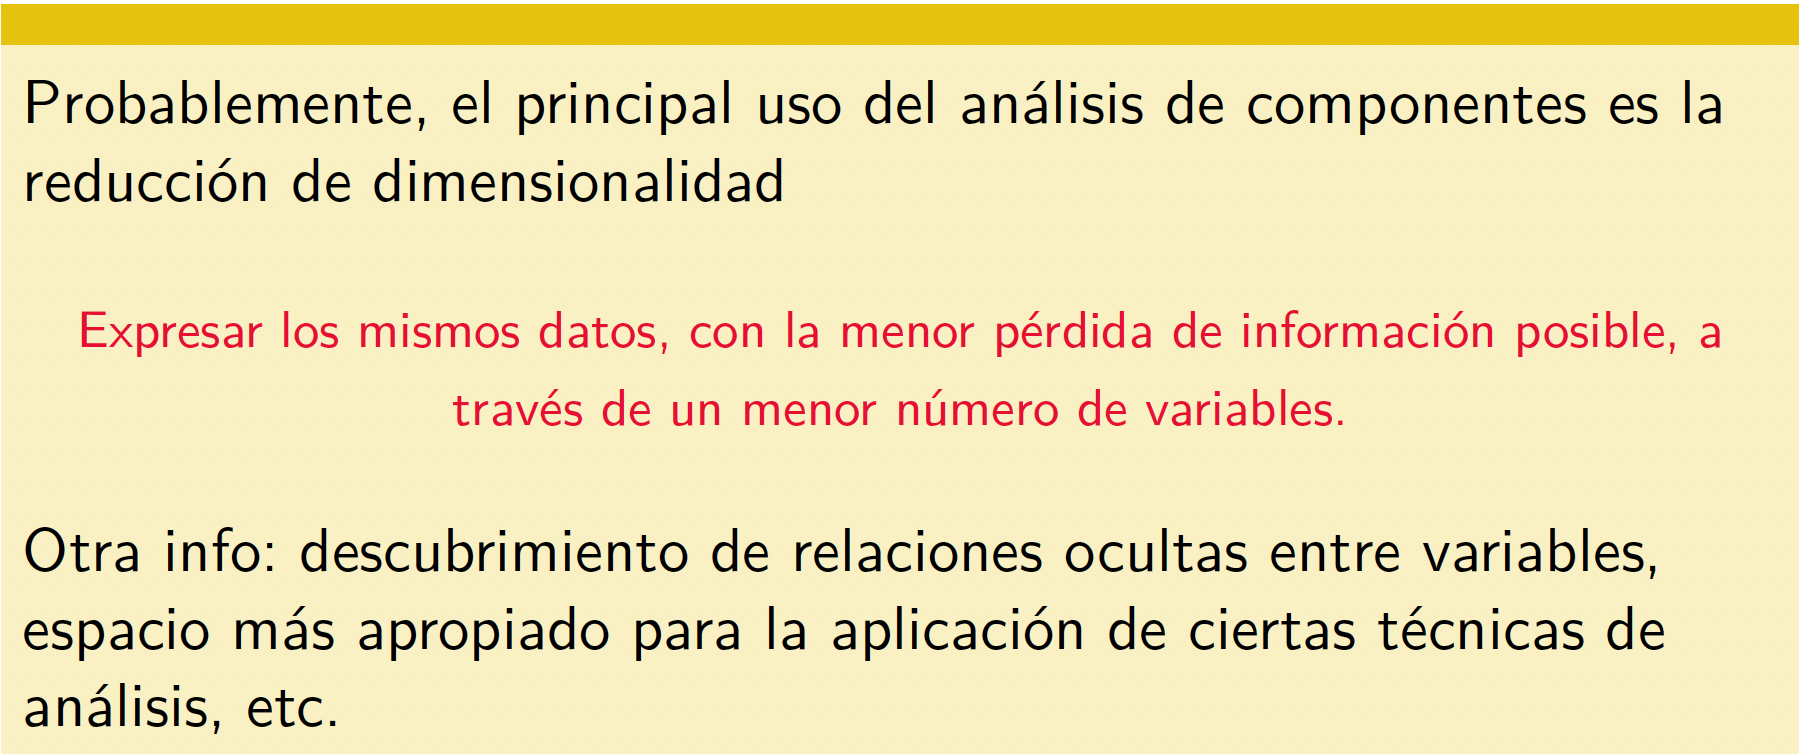

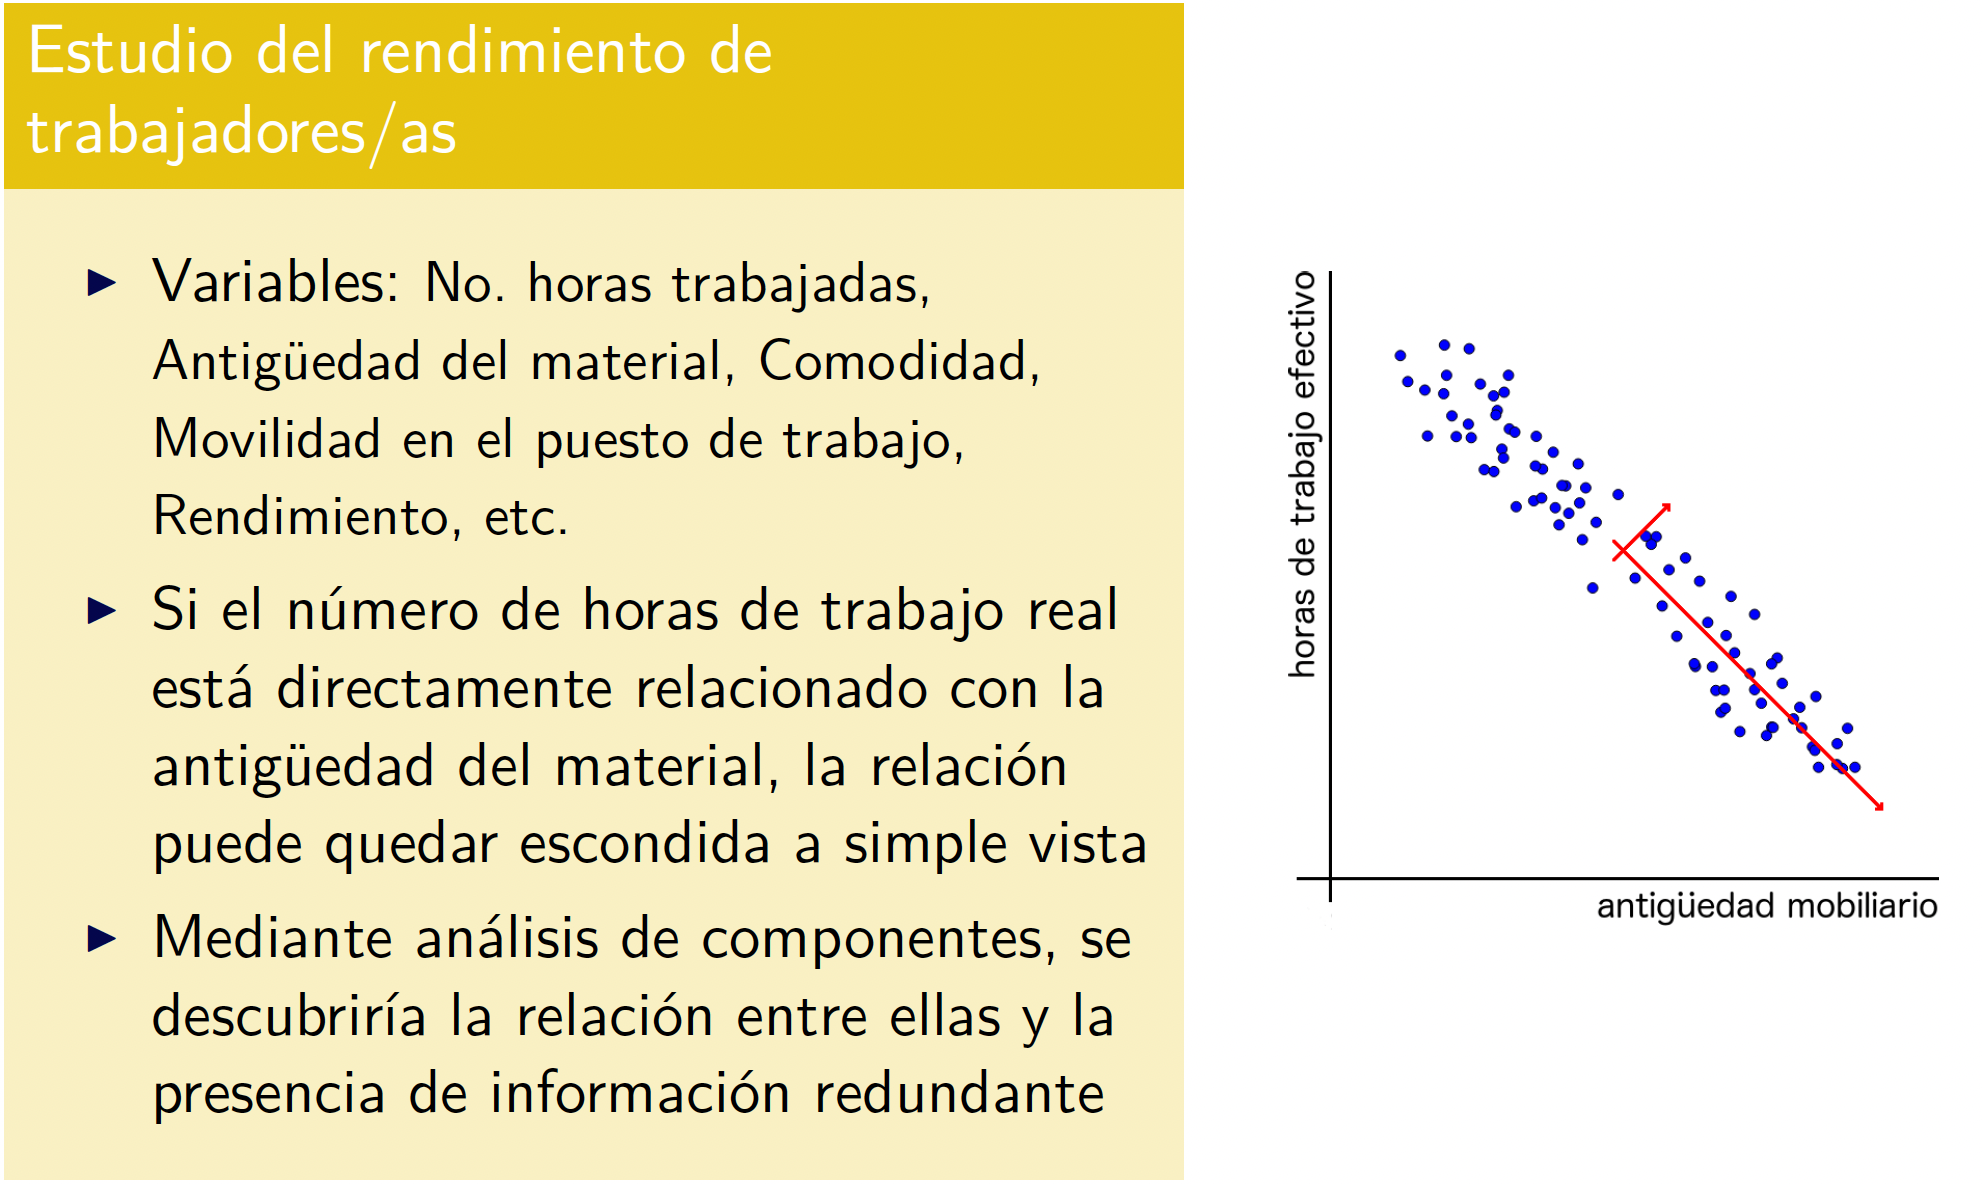

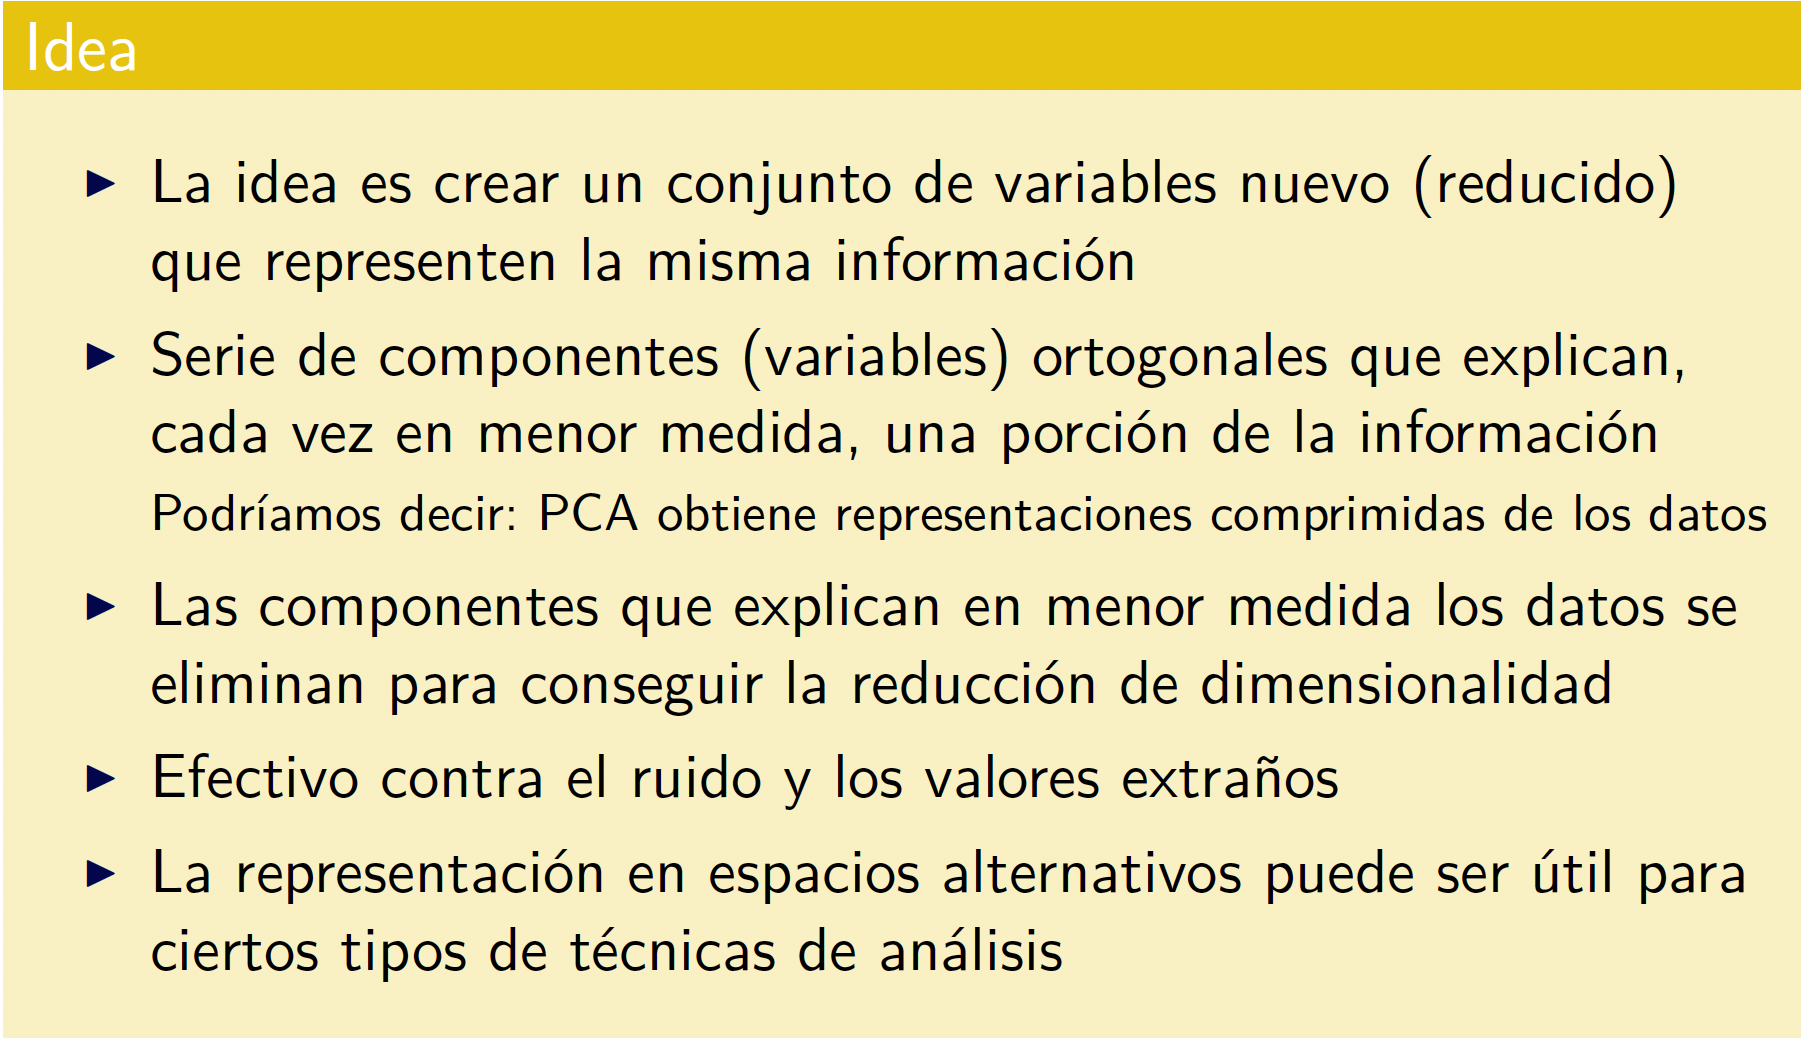

## Ejemplo 1

PCA es fundamentalmente un algoritmo de reducción de dimensionalidad, pero también puede ser útil como herramienta de visualización, filtrado de ruido, extracción e ingeniería de características, y mucho más.


In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [ ]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal')

A simple vista, está claro que existe una relación casi lineal entre las variables `x` e `y`. Esto recuerda a los datos de regresión lineal que exploramos en En profundidad: `Regresión lineal`, pero el planteamiento del problema aquí es ligeramente diferente: en lugar de intentar predecir los valores de `y` a partir de los valores de `x`, el problema de aprendizaje no supervisado intenta aprender sobre la relación entre los valores de `x` e `y`.

En el análisis de componentes principales, esta relación se cuantifica encontrando una lista de los ejes principales en los datos y utilizando esos ejes para describir el conjunto de datos. Usando el estimador PCA de Scikit-Learn, podemos calcular esto de la siguiente manera:

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

El ajuste aprende algunas cantidades de los datos, sobre todo los "componentes" y la "varianza explicada":

In [ ]:
print(pca.components_)

In [ ]:
print(pca.explained_variance_)

Para ver qué significan estos números, visualicémoslos como vectores sobre los datos de entrada, usando los "componentes" para definir la dirección del vector y la "varianza explicada" para definir la longitud al cuadrado del vector:

In [ ]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, 
                    shrinkB=0,
                    color='b')
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal')

Estos vectores representan los ejes principales de los datos, y la longitud del vector es una indicación de cuán "importante" es ese eje para describir la distribución de los datos; más precisamente, es una medida de la varianza de los datos cuando se proyectan. sobre ese eje. La proyección de cada punto de datos sobre los ejes principales son los "componentes principales" de los datos.

## Ejemplo 2

El uso de PCA para la reducción de dimensionalidad implica poner a cero uno o más de los componentes principales más pequeños, lo que da como resultado una proyección de los datos de menor dimensión que preserva la varianza máxima de los datos.

En el siguiente ejemplo utilizaremos el dataset Iris para obtener una nueva representación de los datos es un espacio de menor dimenasión del original.

In [ ]:
%matplotlib inline

# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()

El dataset contiene datos sobre tres plantas de iris (iris setosa, iris versicolour, e iris virginica), descritas mediante cuatro atributos:

1. Longitud del sépalo (cm)
2. Ancho del sépalo (cm)
3. Longitud del pétalo (cm)
4. Ancho del pétalos (cm)

Asignamos los datos y las etiquetas a variables diferentes.

In [ ]:
features = iris.data
label = iris.target
print (features.shape)

Primero vamos a explorar graficamente los datos. Para ello tomamos los dos primeros atributos.

In [ ]:
feat_2dim = features[:,:2]


plt.figure(2, figsize=(8, 6))
plt.clf()
plt.scatter(feat_2dim[:, 0], feat_2dim[:, 1], c=label, cmap=plt.cm.Paired) #The parameter c = label is used to indicate that the 
plt.xlabel('Sepal length')                                                 #color will be given depending on the group it belongs
plt.ylabel('Sepal width')
plt.xlim(feat_2dim[:, 0].min() - .5, feat_2dim[:, 0].max() + .5)
plt.ylim(feat_2dim[:, 1].min() - .5, feat_2dim[:, 1].max() + .5)
plt.xticks(())
plt.yticks(())

## PCA en Scikit-learn

El módulo `PCA` del paquete de `sklearn.decomposition` de Scikit-learn contiene los métodos necesarios para obtener los componentes principales de un conjunto de datos y transformarlos al nuevo espacio de representación.

Utilizando el datset anterior vamos extraer las tres componentes principales y luego transformar el dataset al nuevo espacio de respresentación de los atributos. Para ello usamos:


```
class sklearn.decomposition.PCA(n_components=None, copy=True, whiten=False, svd_solver='auto', tol=0.0, iterated_power='auto', random_state=None)
```



In [ ]:
from sklearn.decomposition import PCA

# We transform the data using the three principal components

pca3 = PCA(n_components=3)
features_reduced_3 = pca3.fit_transform(features)

print (features_reduced_3.shape)

El atributo `n_components` indica el número de componentes principales que queremos utilizar para reducir la dimensionalidad del dataset. A continuación generamos una gráfica con los datos transformados.

Hacemos una gráfica del datset reducido

In [ ]:
fig = plt.figure(1, figsize=(8, 6))
ax = plt.axes(projection ="3d")
ax.scatter(features_reduced_3[:, 0], features_reduced_3[:, 1], features_reduced_3[:, 2], c=label)
ax.set_title("First three principal components")
ax.set_xlabel("1st eigenvector")
ax.set_ylabel("2nd eigenvector")
ax.set_zlabel("3rd eigenvector")
plt.show()

Para reducir a dos dimensiones simplemente tenemos que modificar el atributo `n_components = 2`

El proceso se puede descomponer en tres etapas 
1. Crear el objeto PCA
2. Extraemos los componentes principales 
3. Transformamos los datos

In [ ]:
pca2 = PCA(n_components=2)
pca2.fit(features)
features_reduced_2 = pca2.transform(features)

print (features_reduced_2.shape)

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(features_reduced_2[:, 0], features_reduced_2[:, 1], c=label)



## ¿Cómo elegir el número de componentes principales?

Para elegir k, hay que tener en cuenta dos conceptos:

- **Error de proyección medio cuadrático**, es decir, la diferencia entre los datos originales  y los datos reconstruidos a partir del nuevo espacio de características.

\begin{equation}
\frac{1}{m}\sum_{i=1}^{m}{\mid{x^{(i)} - x_{approx}^{i}\mid}^2}
\end{equation}

- **Variación total de los datos,** se considera un buen número k, al mínimo valor que hace que se cumpla:

\begin{equation}
\frac{\frac{1}{m}\sum_{i=1}^{m}{\mid{x^{(i)} - x_{approx}^{i}\mid}^2}}{\frac{1}{m}\sum_{i=1}^{m}
{\mid{x^{(i)}\mid}^2}} \leq 0.01
\end{equation}
Dicho de otra forma, el se considera un buen número de componentes principales al valor más pequeño de k que  hace que el 99% de la varianza se retenga.

En Scikit-learn podemos obtener el pocentaje de varianza explicada por cada componente principal con el atributo:

```python
PCA.explained_variance_ratio_
```

Vamos a tomar un PCA con todos los componentes posibles, es decir, tantos como variables tenga el dataset inicial

In [ ]:
pca = PCA()
pca.fit(features)

In [ ]:
pca.explained_variance_ratio_

In [ ]:
plt.plot(range(1,5),pca.explained_variance_ratio_)
plt.bar(range(1,5),np.cumsum(pca.explained_variance_ratio_), alpha=.3)
plt.title("Explained variance and pareto")
plt.show()

In [ ]:
print ('Percentage of variance explained (2 components): ', np.cumsum(pca.explained_variance_ratio_)[1]*100)
print ('Percentage of variance explained (3 components): ', np.cumsum(pca.explained_variance_ratio_)[2]*100)

En este caso se podrñia elegir cualquier numero de componentes que claramente explicara buena parte de la varianza de los datos. Con la primera variable ya se explica el 97.7 % 

## Ejemplo 3

Empezamos importando las librerías necesarias y creándonos un dataset de juguete:

In [ ]:
# importamos las librerías necesarias
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

# nos creamos nuestro dataset aleatorio
X = np.zeros((50, 2))
X[:, 0] = np.linspace(0, 50)
X[:, 1] = X[:, 0]
X = X + 5*np.random.randn(X.shape[0], X.shape[1])

# lo mostramos
plt.figure(figsize=(7, 7))
plt.scatter(X[:,0], X[:, 1], alpha=0.5, c='green')

Los datos no están centrados ni tienen varianza 1. Hay que estandarizarlos:

In [ ]:
# estandarizamos los datos
from sklearn.preprocessing import StandardScaler

Xs = StandardScaler().fit_transform(X)

# los mostramos
plt.figure(figsize=(7, 7))
plt.scatter(Xs[:,0], Xs[:, 1], alpha=0.5, c='green')

Ahora podemos aplicar la PCA a nuestros datos:

In [ ]:
# aplicamos la PCA para reducir las variables de 2 a 1
pca_reduce = PCA(1) 

# proyectamos los datos en la nueva componente
X_proj = pca_reduce.fit_transform(Xs) 

# los re-proyectamos en el espacio original usando solo 1 componente
X_rebuild = pca_reduce.inverse_transform(X_proj) 

# esto lo vamos a necesitar para visualizar los ejes que tendríamos si n_componentes=2
pca = PCA(n_components=2)
_ = pca.fit_transform(Xs)

Visualizamos el resultado:

In [ ]:
# para visualizarlo bonito
plt.figure(figsize=(7, 7))
plt.scatter(Xs[:,0], Xs[:, 1], alpha=0.5, c='green')
plt.scatter(X_rebuild[:, 0], X_rebuild[:, 1], alpha=0.3, c='r')

# plot the components
soa = np.hstack((
    np.ones(pca.components_.shape) * pca.mean_, 
    pca.components_ * np.atleast_2d(
        # components scaled to the length of their variance
        np.sqrt(pca.explained_variance_)
    ).transpose()
))
x, y, u, v = zip(*soa)

ax = plt.gca()
ax.quiver(
    x, y, u, v, 
    angles='xy', 
    scale_units='xy', 
    scale=0.5, 
    color='r'
)
plt.axis('scaled')
plt.draw()

plt.legend([
    'original', 
    'projection'
])

# plot the projection errors
for p_orig, p_proj in zip(Xs, X_rebuild):
    plt.plot([p_orig[0], p_proj[0]], [p_orig[1], p_proj[1]], c='g', alpha=0.3)
    
plt.show()

Aunque a primera vista PCA pueda parecer similar a la Regresión Lineal, no son lo mismo. Vamos a verlo con este ejemplo:

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(Xs[:,0].reshape(-1, 1), Xs[:, 1])
# coef_ son los coeficientes de regresión
y_pred = Xs[:,0] * lin_reg.coef_

plt.figure(figsize=(7, 7))

# mostramos los datos
plt.scatter(Xs[:,0], Xs[:, 1], alpha=0.5, c='green')
plt.scatter(X_rebuild[:, 0], X_rebuild[:, 1], alpha=0.3, c='r')
plt.scatter(Xs[:,0], y_pred, alpha=0.5, c='blue')

# mostramos los errores de proyection (PCA)
for p_orig, p_proj in zip(Xs, X_rebuild):
    plt.plot([p_orig[0], p_proj[0]], [p_orig[1], p_proj[1]], c='r', alpha=0.3)

# mostramos los errores de prediccion (LinearRegression)
for p_orig, y in zip(Xs, np.hstack((Xs[:,0].reshape(-1, 1), y_pred.reshape(-1, 1)))):
    plt.plot([p_orig[0], y[0]], [p_orig[1], y[1]], c='b', alpha=0.3)

Aquí se puede observar las diferencias entre ellas:

- PCA trata de minimizar el error de proyección de las muestras a nuestras nuevas "bases" en las que estamos representando los datos tras la proyección (lineas rojas).
- Regresión lineal trata de minimizar el error de predicción (lineas azules).

### Eigenfaces y PCA

En este ejemplo vamos a ver un caso de uso muy común de la PCA: la descomposición de caras en "caras base".

In [ ]:
# Before using PCA, let us try and understand as well as display the original images 
from sklearn.datasets import fetch_olivetti_faces 
oliv=fetch_olivetti_faces() 
print(oliv.keys()) 
print (oliv.data.shape) #tells us there are 400 images that are 64 x 64 (4096) pixels each - See more at: https://shankarmsy.github.io/posts/pca-sklearn.html#sthash.h4DDqQzH.dpuf

In [ ]:
# visualizamos las caras
fig = plt.figure(figsize=(8,8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# cada cara es de 64x64 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i+1, xticks=[], yticks=[])
    ax.imshow(oliv.images[i], cmap=plt.cm.bone, interpolation='nearest')

plt.show()

In [ ]:
# veamos cuanta de la varianza explicada tendríamos al comprimir las imágenes a 8x8 (64 pixels)
X,y=oliv.data, oliv.target
pca_oliv = PCA(64)
X_proj = pca_oliv.fit_transform(X)
print(X_proj.shape)
cumvar = np.cumsum(pca_oliv.explained_variance_ratio_)
print(cumvar)
plt.plot(cumvar)

Hemos conseguido retener el 89.7% de la varianza explicada después de haber comprimido las 4096 dimensiones del dataset original a 64, haciendo uso de las primeras 64 componentes principales.

Cada una de estas componentes principales explica cierta cantidad de varianza del dataset original. El parámetro `components_` del estimador nos da las componentes con máxima varianza explicada

In [ ]:
print(pca_oliv.components_.shape)

Vamos a visualizar nuestro dataset reducido a 64 componentes. Podemos observar que lo que estamos viendo NO es una reconstrucción del dataset original, sino las componentes principales o "bases" de nuestros datos reducidos. Las componentes principales son vectores de longitud igual al número de características original (4096), así que lo reshapeamos a 64x64.

In [ ]:
fig = plt.figure(figsize=(8,8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# mostramos las caras base
for i in range(64):
    ax = fig.add_subplot(8, 8, i+1, xticks=[], yticks=[])
    ax.imshow(np.reshape(pca_oliv.components_[i,:], (64,64)), cmap=plt.cm.bone, interpolation='nearest')

Impresionante, intentemos ahora reconstruir las imágenes utilizando el nuevo conjunto de datos reducido. En otras palabras, transformamos las Imágenes de 64x64 píxeles en imágenes de 8x8. Ahora, para visualizar cómo se ven estas imágenes, necesitamos transformar inversamente las imágenes de 8x8 volver a la dimensión 64x64. 

Tenga en cuenta que no volvemos a los datos originales, simplemente volvemos a los Dimensión real de las imágenes originales para que podamos visualizarlas.

In [ ]:
X_inv_proj = pca_oliv.inverse_transform(X_proj)
# reshapeamos como 400 imagenes de 64x64 dimensiones
X_proj_img = np.reshape(X_inv_proj,(400,64,64))

# visualizamos las caras originales
fig = plt.figure(figsize=(8,8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(64):
    ax = fig.add_subplot(8, 8, i+1, xticks=[], yticks=[])
    ax.imshow(oliv.images[i], cmap=plt.cm.bone, interpolation='nearest')

# mostramos las caras reconstruidas
fig = plt.figure(figsize=(8,8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(64):
    ax = fig.add_subplot(8, 8, i+1, xticks=[], yticks=[])
    ax.imshow(X_proj_img[i], cmap=plt.cm.bone, interpolation='nearest')

En esta sección hemos discutido el uso del análisis de componentes principales para la reducción de dimensionalidad, para la visualización de datos de alta dimensión, para el filtrado de ruido y para la selección de características dentro de datos de alta dimensión. Debido a la versatilidad e interpretabilidad del PCA, se ha demostrado que es eficaz en una amplia variedad de contextos y disciplinas.

La principal debilidad del PCA es que tiende a verse muy afectado por valores atípicos en los datos. Por esta razón, se han desarrollado muchas variantes robustas de PCA, muchas de las cuales actúan para descartar de forma iterativa puntos de datos que están mal descritos por los componentes iniciales.

FUENTES:
- https://machinelearningmedium.com/2018/04/22/principal-component-analysis/
- https://machinelearningmastery.com/calculate-principal-component-analysis-scratch-python/
- https://shankarmsy.github.io/posts/pca-sklearn.html

RECURSOS:

- https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html
- https://plot.ly/python/v3/ipython-notebooks/principal-component-analysis/
- https://towardsdatascience.com/a-one-stop-shop-for-principal-component-analysis-5582fb7e0a9c
- https://medium.com/@kyasar.mail/pca-principal-component-analysis-729068e28ec8
- http://sebastianraschka.com/Articles/2015_pca_in_3_steps.html (básico)
- https://sebastianraschka.com/Articles/2014_pca_step_by_step.html (avanzado)